In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/benjamin.korke/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

* train.csv - Personal records for about two-thirds (ca. 8700) of the passengers, to be used as training data.
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* test.csv - Personal records for the remaining one-third (ca. 4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
* sample_submission.csv - A submission file in the correct format.
* PassengerId - Id for each passenger in the test set.
* Transported - The target. For each passenger, predict either True or False.


# Over all EDA
* ### Missing Values
* ### Description
* ### Datetypes
* ### Distribution

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
missing_train = pd.DataFrame(train.isna().sum())
missing_train["Missing_total"] = missing_train[0]/train.shape[0]

print(missing_train["Missing_total"].sort_values(ascending=True))
print(train.shape)

PassengerId     0.000000
Transported     0.000000
Age             0.020591
RoomService     0.020821
Destination     0.020936
FoodCourt       0.021051
Spa             0.021051
VRDeck          0.021627
Cabin           0.022892
Name            0.023007
HomePlanet      0.023122
VIP             0.023352
ShoppingMall    0.023927
CryoSleep       0.024963
Name: Missing_total, dtype: float64
(8693, 14)


In [6]:
missing_test = pd.DataFrame(test.isna().sum())
missing_test["Missing_total"] = missing_test[0]/test.shape[0]
print(missing_test["Missing_total"].sort_values(ascending=True))
print(test.shape)

PassengerId     0.000000
VRDeck          0.018705
RoomService     0.019172
HomePlanet      0.020341
Age             0.021277
Destination     0.021510
CryoSleep       0.021744
VIP             0.021744
Name            0.021978
ShoppingMall    0.022913
Cabin           0.023381
Spa             0.023615
FoodCourt       0.024784
Name: Missing_total, dtype: float64
(4277, 13)


# EDA

In [7]:
vip_mask = (train['VIP'] == True) & (train['Transported'] == True)
vip_survivors = round((len(train[vip_mask]) / len(train[train['VIP'] == True]) * 100), 2)
print(f'Out of all VIPs, only {vip_survivors} % survived.')

Out of all VIPs, only 38.19 % survived.


<AxesSubplot:ylabel='Frequency'>

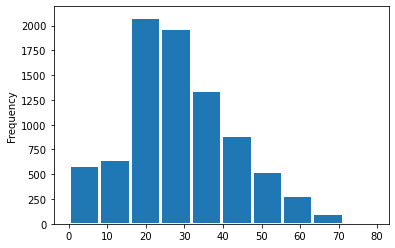

In [8]:
# Majority of the passangers are in their 20s and 30s
train.Age.plot(kind='hist', edgecolor='white', linewidth=3)

<AxesSubplot:ylabel='CryoSleep'>

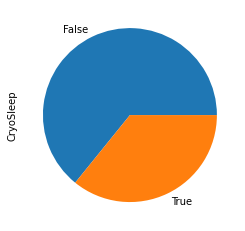

In [9]:
train.CryoSleep.value_counts().plot(kind='pie')

In [10]:
train_num = [f for f in train.columns if train[f].dtype == "float64"]
train_cat = [f for f in train.columns if train[f].dtype == "object"]


# Distribution of numeric columns

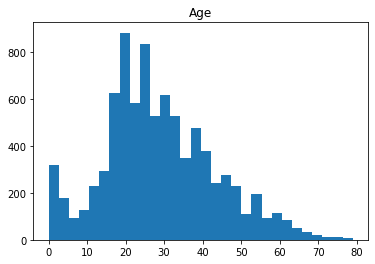

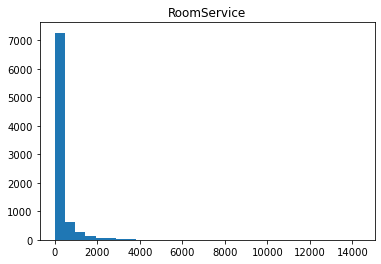

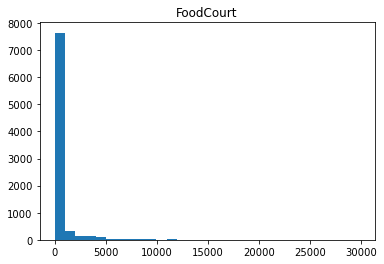

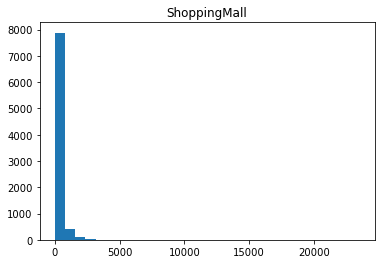

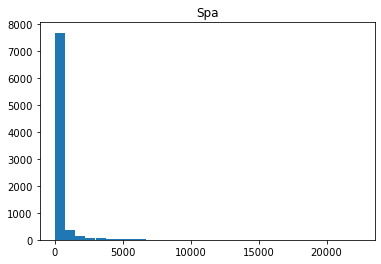

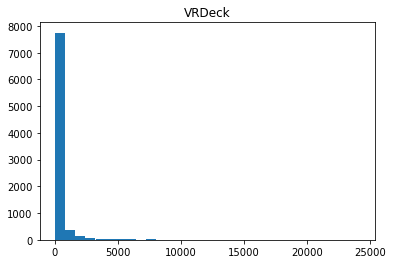

In [11]:
for i in train_num:
  plt.hist(train[i], bins=30)
  plt.title(i)
  plt.show()

In [12]:
# distribution among Age among categorical features
for z in ["PassengerId", "Name", "Cabin"]:
   train_cat.remove(z)



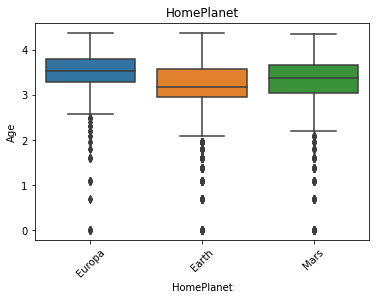

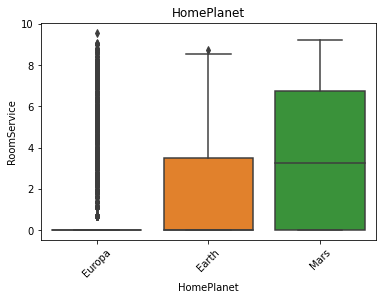

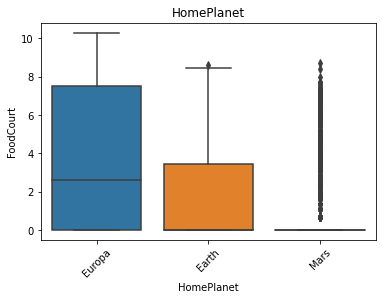

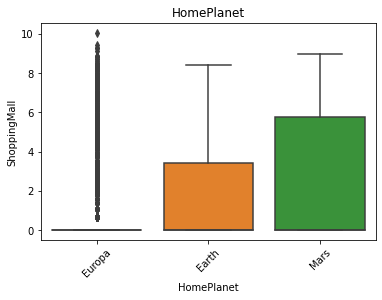

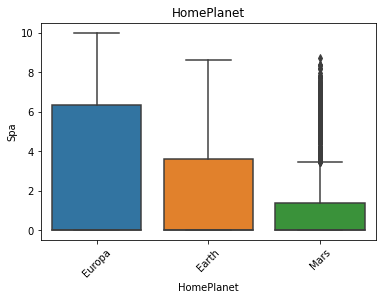

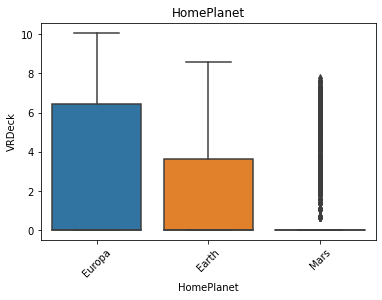

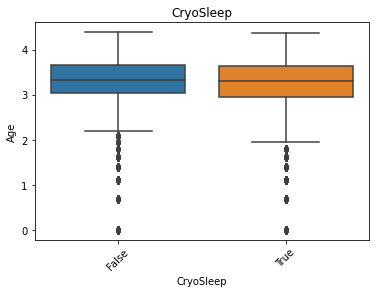

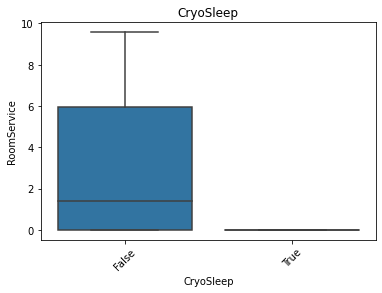

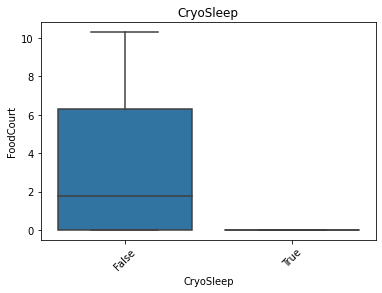

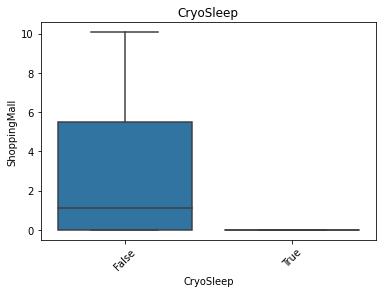

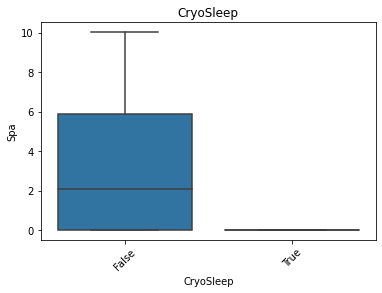

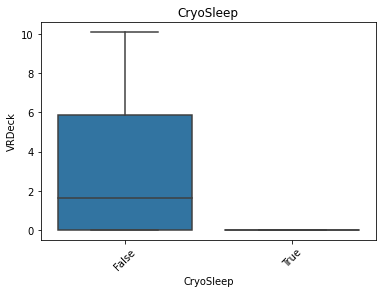

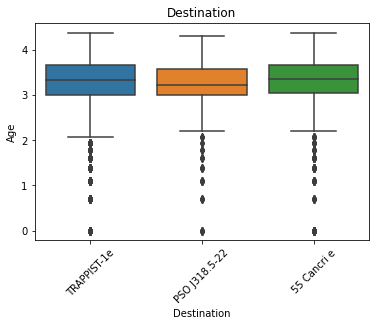

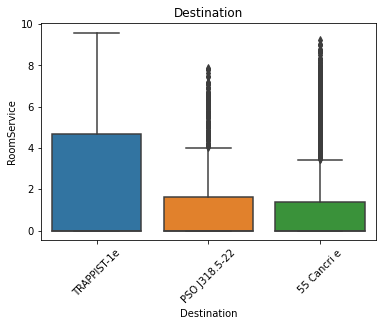

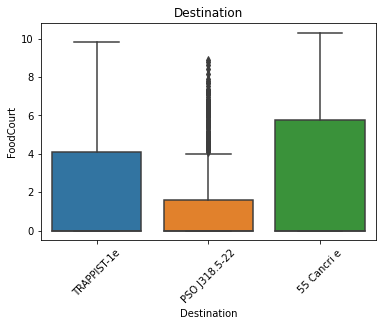

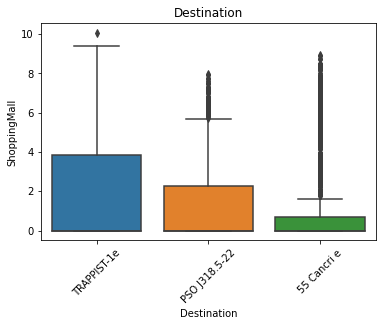

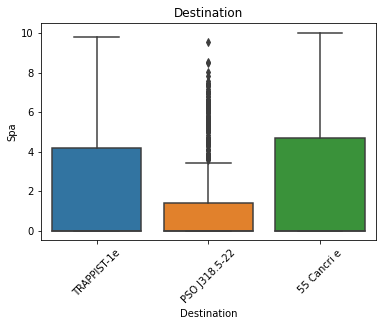

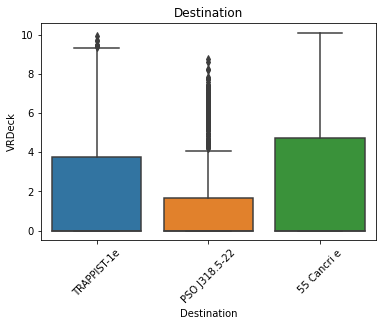

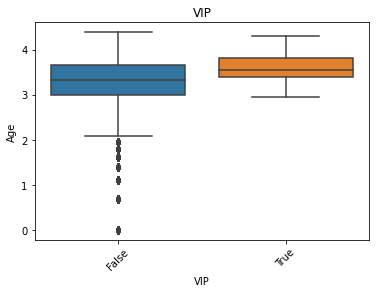

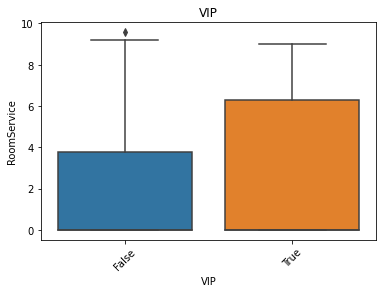

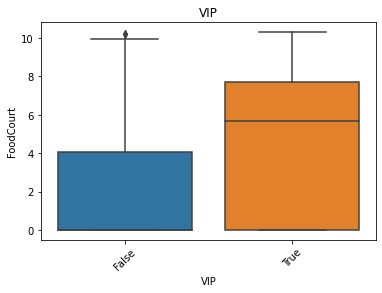

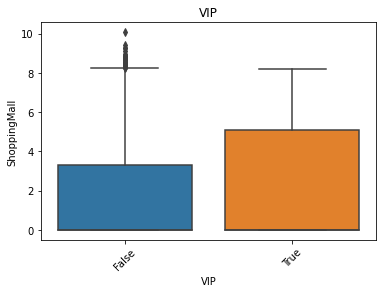

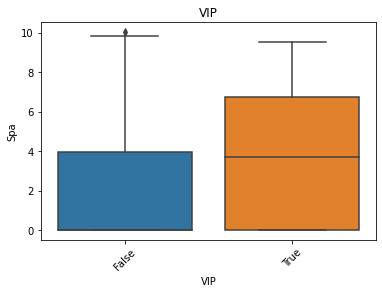

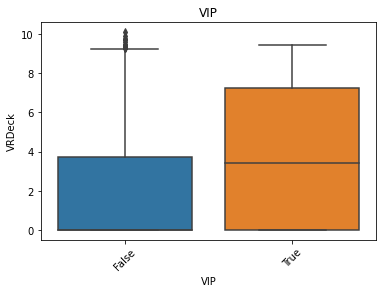

In [13]:
for c in train_cat:
    for i in train_num:
        sns.boxplot(data = train, x = train[c], y = np.log1p(train[i]))
        plt.title(c)
        plt.xticks(rotation = 45)
        plt.show()

* Median schwer einzuschätzen, da viele Werte auf 0 sind
* should help us fill us missing values by groupby.transform


<AxesSubplot:>

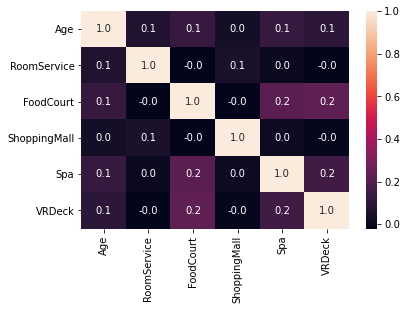

In [14]:
# Mal Korrelation nur bei Leuten checken die nicht im Cryoschlaf sind
corr = train[train_num].corr()
sns.heatmap(corr, annot = True, fmt=".1f")

# Conclusion Correlation
Numerical features are not very high correlated among each other, thus we should keep all features!

Next Step: Find correlation to targer variable - somehow! 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [15]:
# survival dependent on Destination
train.pivot_table(index="Transported", columns="Destination", values="PassengerId", aggfunc="count")

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
False,702,395,3128
True,1098,401,2787


In [16]:
# survival dependent on HomePlanet
train.pivot_table(index="Transported", columns="HomePlanet", values="PassengerId", aggfunc= "count")

HomePlanet,Earth,Europa,Mars
Transported,,,
False,2651,727,839
True,1951,1404,920


In [17]:
# survival dependent on CryoSleep
train.pivot_table(index="Transported", columns="CryoSleep", values="PassengerId", aggfunc= "count")

CryoSleep,False,True
Transported,,
False,3650,554
True,1789,2483


In [18]:
# survival dependent on VIP
train.pivot_table(index="Transported", columns="VIP", values="PassengerId", aggfunc= "count")

VIP,False,True
Transported,,
False,4093,123
True,4198,76


In [19]:
# survival dependent on VIP
train.pivot_table(index="Transported", columns="Cabin", values="PassengerId", aggfunc= "count").T

Transported,False,True
Cabin,,
A/0/P,1.0,1.0
A/0/S,2.0,NaN
A/1/S,NaN,3.0
A/10/P,1.0,NaN
A/10/S,NaN,1.0
...,...,...
T/0/P,1.0,NaN
T/1/P,1.0,NaN
T/2/P,1.0,NaN


In [20]:
# how many ppl have survived with cryosleep 
cryo_df_count = train.groupby(["Transported", "CryoSleep"]).count().reset_index()
cryo_df_count
#jetzt noch Service_x_count um herauszufinden, wie viele Personen pro Service gestorben sind

,Transported,CryoSleep,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,False,False,3650,3563,3571,3564,3580,3576,3569,3576,3578,3571,3571,3569
1,False,True,554,544,537,551,536,535,538,546,538,543,545,542
2,True,False,1789,1752,1760,1745,1763,1742,1759,1753,1757,1755,1749,1742
3,True,True,2483,2418,2416,2438,2419,2427,2431,2421,2403,2429,2430,2433


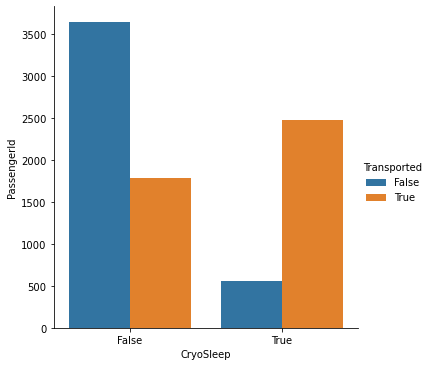

In [21]:
sns.catplot(data = cryo_df_count , x="CryoSleep", y = "PassengerId" , hue="Transported", kind="bar")

In [22]:
cryo_df_mean = train.groupby(["Transported", "HomePlanet"]).mean()
cryo_df_mean=pd.DataFrame(cryo_df_mean.stack()).reset_index()
cryo_df_mean


,Transported,HomePlanet,level_2,0
0,False,Earth,Age,27.526559
1,False,Earth,RoomService,196.489370
2,False,Earth,FoodCourt,114.177220
3,False,Earth,ShoppingMall,108.256074
4,False,Earth,Spa,218.701118
5,False,Earth,VRDeck,207.375725
6,False,Europa,Age,36.588483
7,False,Europa,RoomService,352.870423
8,False,Europa,FoodCourt,1724.696801
9,False,Europa,ShoppingMall,162.040903


<Figure size 720x864 with 0 Axes>

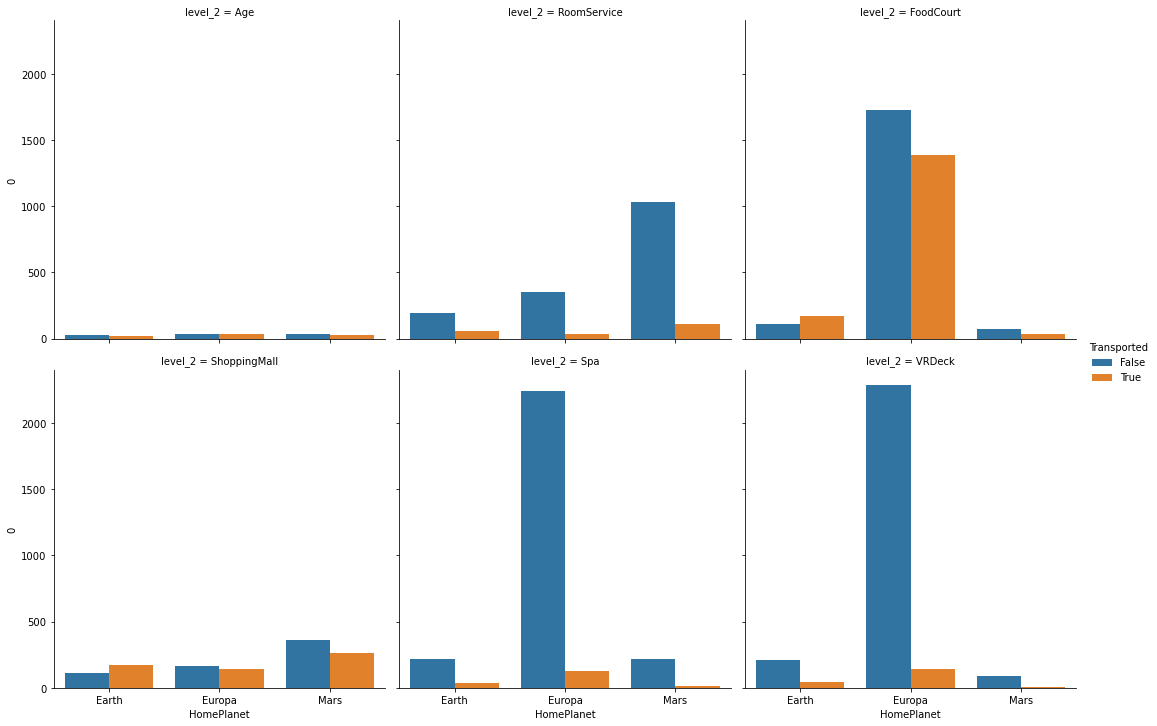

In [23]:
plt.figure(figsize=(10,12))
sns.catplot(data = cryo_df_mean , x="HomePlanet", y = 0 , 
            hue="Transported", col="level_2",kind="bar",col_wrap = 3)

* if ppl spend money on average more money on Roomservice, no matter from which Homeplanet, they died to a high probability
* if ppl spend more money in Spa or VR in average, and came from Europa, they died

* combination of Roomservice and homeplanet is important and Europa + Spa and Europa + VRDeck

In [25]:
# sum over 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
train["spent_total"] = np.sum(train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']], axis=1)
test["spent_total"] = np.sum(test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']], axis=1)


In [26]:
service_df = train[train["spent_total"]>0]

In [27]:
home_service_df = service_df.groupby(["Transported", "HomePlanet", "RoomService", "FoodCourt",
                                 "ShoppingMall", "Spa", "VRDeck"]).size().reset_index()
home_service_df

,Transported,HomePlanet,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,0
0,False,Earth,0.0,0.0,0.0,0.0,595.0,1
1,False,Earth,0.0,0.0,0.0,0.0,607.0,1
2,False,Earth,0.0,0.0,0.0,0.0,628.0,1
3,False,Earth,0.0,0.0,0.0,0.0,645.0,1
4,False,Earth,0.0,0.0,0.0,0.0,693.0,1
...,...,...,...,...,...,...,...,...
4417,True,Mars,2229.0,0.0,1349.0,121.0,0.0,1
4418,True,Mars,2318.0,0.0,647.0,81.0,0.0,1
4419,True,Mars,2627.0,0.0,597.0,0.0,0.0,1
4420,True,Mars,2997.0,0.0,3.0,0.0,7.0,1


In [28]:
test.isna().sum().index


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'spent_total'],
      dtype='object')

# Feature Engineering

In [29]:
train.Destination.mode()

0    TRAPPIST-1e
Name: Destination, dtype: object

In [30]:
#train= train[~train["ShoppingMall"].isna()]
train["Age"].fillna(train.groupby("HomePlanet")["Age"].transform("mean"),inplace=True)
train["Age"].fillna(train["Age"].mean(), inplace=True)
test["Age"].fillna(test.groupby("HomePlanet")["Age"].transform("mean"),inplace=True)
test["Age"].fillna(test["Age"].mean(), inplace=True)




#train = train[~train["Age"].isna()]
#train = train.dropna()
#test = test.dropna()

In [34]:
def filling(df):
    for i in df.columns:
        df[i].fillna(df[i].mode().values[0], inplace=True)
    return df

train = filling(train)
test = filling(test)

In [35]:
test.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
spent_total     0
dtype: int64

In [36]:
train.Name = train.Name.astype("str")
train.Cabin = train.Cabin.astype("str")
test.Name = test.Name.astype("str")
test.Cabin = test.Cabin.astype("str")
#train = train[train["Cabin"]!="nan"]
train["cabin_side"] = train["Cabin"].apply(lambda x: x.split("/")[2])
train["cabin_deck"] = train["Cabin"].apply(lambda x: x.split("/")[0])
test["cabin_side"] = test["Cabin"].apply(lambda x: x.split("/")[2])
test["cabin_deck"] = test["Cabin"].apply(lambda x: x.split("/")[0])

# survival dependent on cabin_side
train.pivot_table(index="Transported", columns="cabin_side", values="PassengerId", aggfunc= "count")
#people on cabin with S had a higher chance to survive

cabin_side,P,S
Transported,,
False,2308,2007
True,1898,2480


In [37]:
#find groups that traveled together
train["ticket_grp"] = train.PassengerId.apply(lambda x: x.split("_")[0])
train["surname"] = train.Name.apply(lambda x: x.split(" ")[-1])
test["ticket_grp"] = test.PassengerId.apply(lambda x: x.split("_")[0])
test["surname"] = test.Name.apply(lambda x: x.split(" ")[-1])


In [38]:
# travel_grp
def travel_grp(df):
    df["travel_grp"] = 0
    for grp, grp_df in df.groupby("ticket_grp"):
        if len(grp_df)>1:

            for ind, row in grp_df.iterrows():
                grp_id = row["PassengerId"]

                df.loc[df["PassengerId"]==grp_id, "travel_grp"]= 1
    return df
      
train = travel_grp(train)
test = travel_grp(test)

    
    

In [39]:
travelgrp_df = train.groupby(["Transported","travel_grp"]).size().reset_index()
travelgrp_df

,Transported,travel_grp,0
0,False,0,2631
1,False,1,1684
2,True,0,2174
3,True,1,2204


<AxesSubplot:xlabel='travel_grp', ylabel='0'>

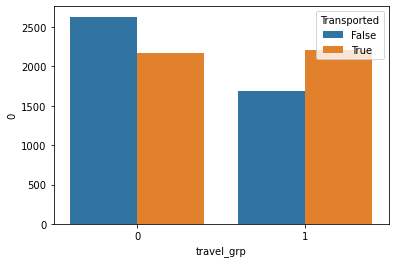

In [40]:
sns.barplot(data=travelgrp_df, x="travel_grp", y= 0, hue="Transported")

* travel grp has an impact on the survivability of the passengers!

In [41]:
# family
def fam_grp(df):
    df["family"] = 0
    for grp, grp_df in df.groupby("surname"):
        if len(grp_df)>1:
            for ind, row in grp_df.iterrows():
                grp_id = row["PassengerId"]
                df.loc[df["PassengerId"]==grp_id, "family"]= 1
    return df
            
train = fam_grp(train)
test = fam_grp(test)

In [42]:
family_df = train.groupby(["Transported","family"]).size().reset_index()
family_df

,Transported,family,0
0,False,0,159
1,False,1,4156
2,True,0,223
3,True,1,4155


<AxesSubplot:xlabel='family', ylabel='0'>

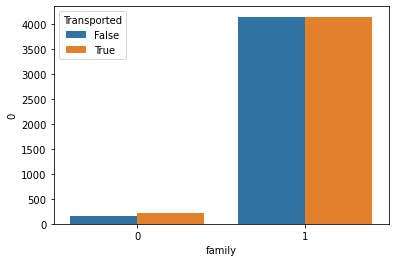

In [43]:
sns.barplot(data=family_df, x="family", y= 0, hue="Transported")

* family column has no impact on the prediction
* maybe a combination of deck, cabin, homeplanet and money_spent

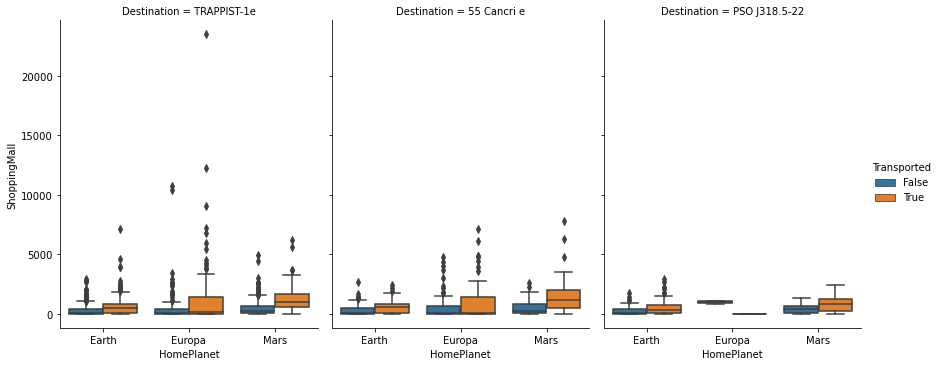

In [44]:
sns.catplot(data=train[train["ShoppingMall"]>0], y="ShoppingMall",
            x = "HomePlanet", hue = "Transported",col = "Destination",
            kind="box", height=5, aspect=.8)

* Marsianer haben mehr ausgegeben in der Regel, wo hatten die ihre Zimmer? evtl neue Spalte, scalen oder OHE

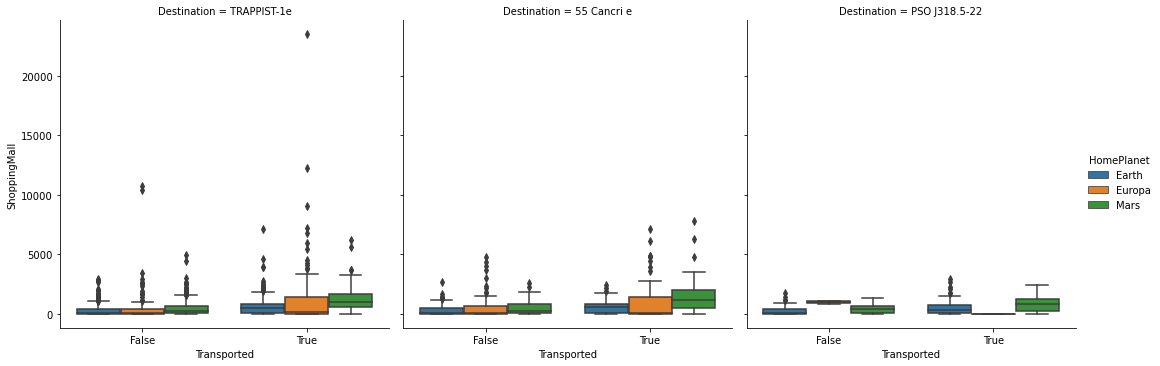

In [45]:
sns.catplot(data=train[train["ShoppingMall"]>0], y="ShoppingMall",
            x = "Transported", hue = "HomePlanet",col = "Destination", kind="box")

* Vom Mars haben mehr ausgegeben 
* Europäer wollen nicht nach PSO

In [46]:
train.groupby([ "Destination", "HomePlanet"])["ShoppingMall"].mean()

Destination    HomePlanet
55 Cancri e    Earth         126.592233
               Europa        124.600451
               Mars          386.642487
PSO J318.5-22  Earth          92.796703
               Europa        104.631579
               Mars          379.428571
TRAPPIST-1e    Earth         140.058736
               Europa        164.494290
               Mars          288.884641
Name: ShoppingMall, dtype: float64

In [47]:
# sum over 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
train["spent_total"] = np.sum(train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']], axis=1)
test["spent_total"] = np.sum(test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']], axis=1)


In [48]:

# rates for service and courts
def service_rates(df):
    rate_list = []
    for i in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:

        var= f'{i}_rate'

        df[var] = df.apply(lambda x: x[i]/x["spent_total"] if x[i]> 0 else 0, axis=1)
        rate_list.append(var)
    return df

train = service_rates(train)
test = service_rates(test)


In [49]:
train["age_to_money"] = train.apply(lambda x: x["Age"]/ x["spent_total"] if x["spent_total"] > 0 else 0, axis=1)
#train["shopping_rate"] = train.apply(lambda x: x["ShoppingMall"] / x["spent_total"] 
 #                                    if x["ShoppingMall"] > 0 else 0, axis=1)

test["age_to_money"] = test.apply(lambda x: x["Age"]/ x["spent_total"] if x["spent_total"] > 0 else 0, axis=1)
#test["shopping_rate"] = test.apply(lambda x: x["ShoppingMall"] / x["spent_total"] 
 #                                    if x["ShoppingMall"] > 0 else 0, axis=1)

In [50]:
def age_binning(x):
  if x <= 6:
    return "baby"
  if x < 13:
    return "child"
  if x < 18:
    return "teen"
  if x < 35:
    return "adult"
  if x < 60:
    return "mid"
  else:
    return "grand"

train["age_bin"] = train.Age.apply(age_binning)
test["age_bin"] = test.Age.apply(age_binning)

In [51]:
# distribution of decks for transported ppl
decks = train.groupby(["Transported", "cabin_deck", "HomePlanet", "cabin_side"])["PassengerId"].count().reset_index()
decks


,Transported,cabin_deck,HomePlanet,cabin_side,PassengerId
0,False,A,Earth,P,2
1,False,A,Europa,P,64
2,False,A,Europa,S,63
3,False,B,Earth,P,1
4,False,B,Earth,S,2
...,...,...,...,...,...
61,True,G,Earth,P,572
62,True,G,Earth,S,791
63,True,G,Europa,S,40
64,True,G,Mars,S,18


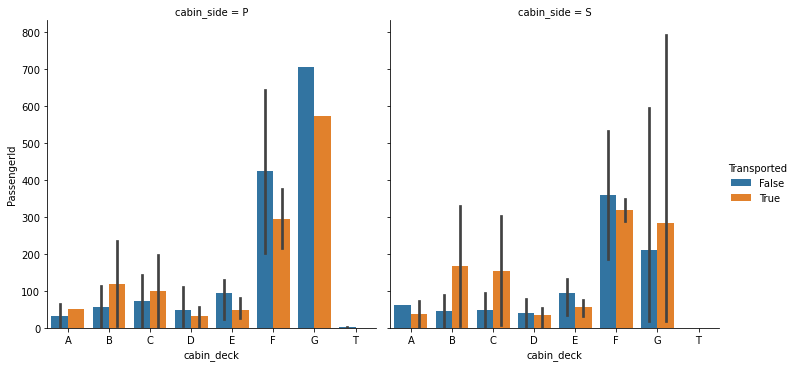

In [52]:
# distribution of decks for transported ppl
sns.catplot(data=decks, x = "cabin_deck", y = "PassengerId", hue = "Transported", col="cabin_side", kind="bar")

* evtl. B und C : 3
* A, D, G: 2
* E, F: 1
* F and Mars is good
* F and earth is very good
* combination of cabin side und deck is very important too


### Conclusion= We need cabin side + deck and deck+homeplanet 
* deck = A,B,C,...

In [53]:
def cabin_converter(row):
    
    if row["HomePlanet"] == "Europa" and row["cabin_deck"]=="G":
        return 7
    
    elif row["HomePlanet"] == "Europa" and row["cabin_deck"]=="E":
        return 6
    
    elif row["HomePlanet"] == "Europa" and row["cabin_deck"]=="D":
        return 7
    
    elif row["HomePlanet"] == "Europa" and row["cabin_deck"]=="C":
        return 9
    
    elif row["HomePlanet"] == "Europa" and row["cabin_deck"]=="B":
        return 10
    
    elif row["HomePlanet"] == "Europa" and row["cabin_deck"]=="A":
        return 5
    
    
    
    elif row["HomePlanet"] == "Mars" and row["cabin_deck"]=="F":
        return 8
    
    elif  row["HomePlanet"] == "Mars" and row["cabin_deck"]== "G":
        return 5
    
    elif  row["HomePlanet"] == "Mars" and row["cabin_deck"]== "E":
        return 1
    
    elif  row["HomePlanet"] == "Mars" and row["cabin_deck"]== "D":
        return 2
    
    
    
    
    elif  row["HomePlanet"] == "Earth" and row["cabin_deck"]== "E":
        return 3
    
    elif row["HomePlanet"] == "Earth" and row["cabin_deck"]=="F":
        return 1
    
    elif row["HomePlanet"] == "Earth" and row["cabin_deck"]=="C":
        return 8
    
    elif row["HomePlanet"] == "Earth" and row["cabin_deck"]=="B":
        return 8
    
    elif row["HomePlanet"] == "Earth" and row["cabin_deck"]=="A":
        return 5
    
    elif row["HomePlanet"] == "Earth" and row["cabin_deck"]=="D":
        return 5

In [54]:
train["cabin_num"] = train.apply(cabin_converter, axis=1)
test["cabin_num"] = test.apply(cabin_converter, axis=1)

In [55]:
train.cabin_num.value_counts()

1.0     2014
8.0     1136
10.0     766
9.0      734
3.0      418
5.0      303
2.0      282
7.0      247
6.0      128
Name: cabin_num, dtype: int64

### Use numerical values for Homeplanet to make calculation with cabindecks

### maybe we dont need planet_converter not anymore because of the cabin converter, it holds the homeplanet values already

In [61]:
train.groupby(["Transported", "HomePlanet"]).size()

Transported  HomePlanet
False        Earth         2749
             Europa         727
             Mars           839
True         Earth         2054
             Europa        1404
             Mars           920
dtype: int64

calculation planet_rate

* 2054 / 2749+2054
* 

In [111]:



def planet_converter(row):
    if row== "Earth":
        #((2749+ 2054)/train.shape[0]) * 
        return (2054/2749)
    
    if row == "Europa":
        #((727+ 1404)/train.shape[0]) * 
        return  (1404/727)
    
    if row == "Mars":
        #((839+ 920)/train.shape[0]) * 
        return (920/839)

In [112]:
train["home_num"] = train.HomePlanet.apply(planet_converter)
test["home_num"] = test.HomePlanet.apply(planet_converter)

In [113]:
train.home_num.value_counts()

0.747181    4803
1.931224    2131
1.096544    1759
Name: home_num, dtype: int64

In [114]:
train["home_cabin_rate"] = train["cabin_num"] * train["home_num"]
test["home_cabin_rate"] = test["cabin_num"] * test["home_num"]

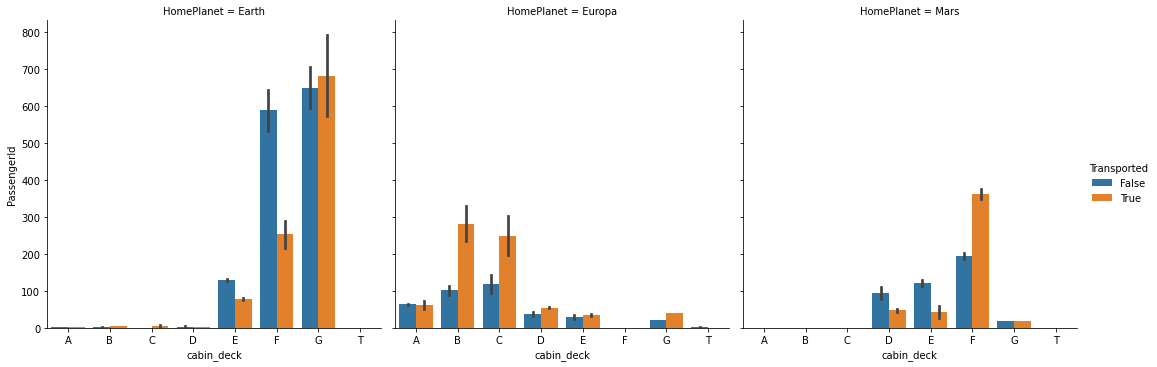

In [115]:
sns.catplot(data=decks, x = "cabin_deck", y = "PassengerId",col="HomePlanet", hue = "Transported", kind="bar")

* Europa eher obere Decks und in B und C eher überlebt haben
* MArs D und E eher gestorben und in F eher überlebt
* Von Earth in F mehr gestorben, insgesamt mehr Menschen und auf Deck F hohe W'keit für Tod
# important
# F und Erde= nicht gut
# F und Mars = sehr gut

# investigate each service for each homeplanet

In [116]:
service_df = train[train["spent_total"]>0]
room_df = service_df[service_df["RoomService"]>0]
food_df = service_df[service_df["FoodCourt"]>0]
shop_df = service_df[service_df["ShoppingMall"]>0]
spa_df = service_df[service_df["Spa"]>0]
vr_df = service_df[service_df["VRDeck"]>0]

In [117]:
room_grp = room_df.groupby(["Transported", "HomePlanet","cabin_num"]).size().reset_index()
room_grp

,Transported,HomePlanet,cabin_num,0
0,False,Earth,1.0,674
1,False,Earth,3.0,148
2,False,Earth,5.0,5
3,False,Earth,8.0,1
4,False,Europa,5.0,44
5,False,Europa,6.0,19
6,False,Europa,7.0,32
7,False,Europa,9.0,89
8,False,Europa,10.0,57
9,False,Mars,1.0,149


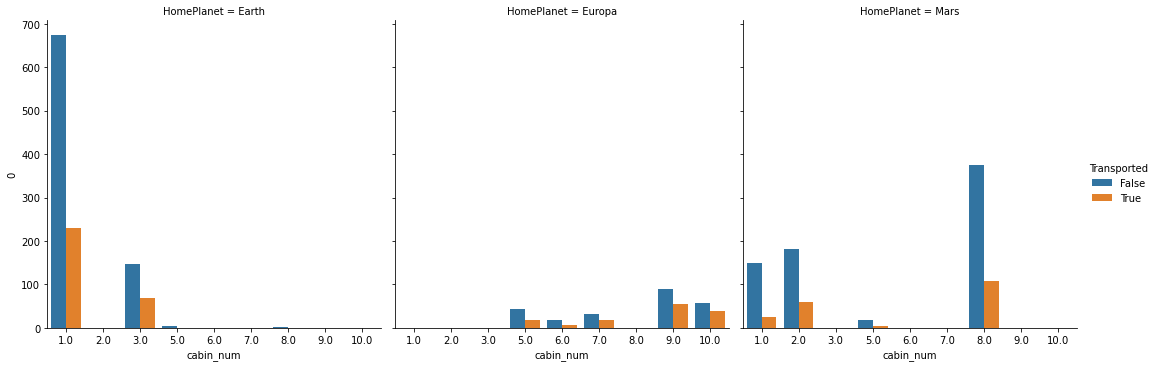

In [118]:
sns.catplot(data=room_grp, x = "cabin_num" , y=0, hue="Transported", col="HomePlanet", kind="bar")

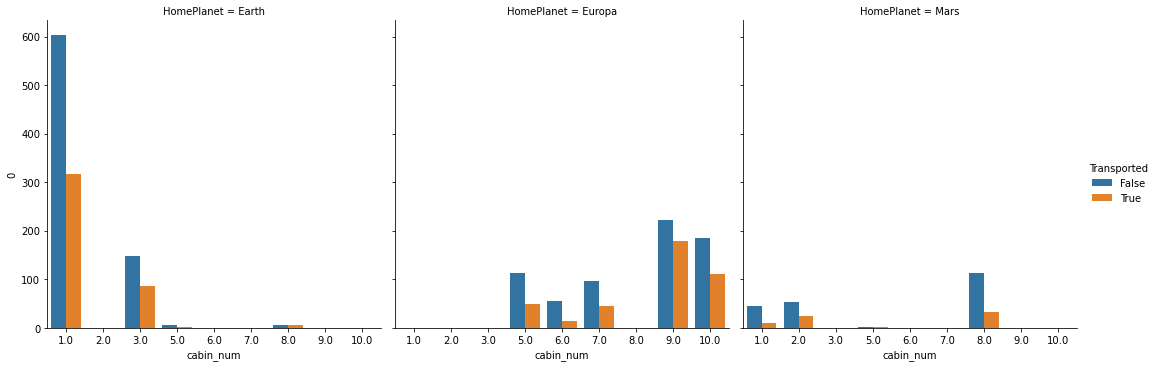

In [119]:
food_grp = food_df.groupby(["Transported", "HomePlanet","cabin_num"]).size().reset_index()
sns.catplot(data=food_grp, x = "cabin_num" , y=0, hue="Transported", col="HomePlanet", kind="bar")

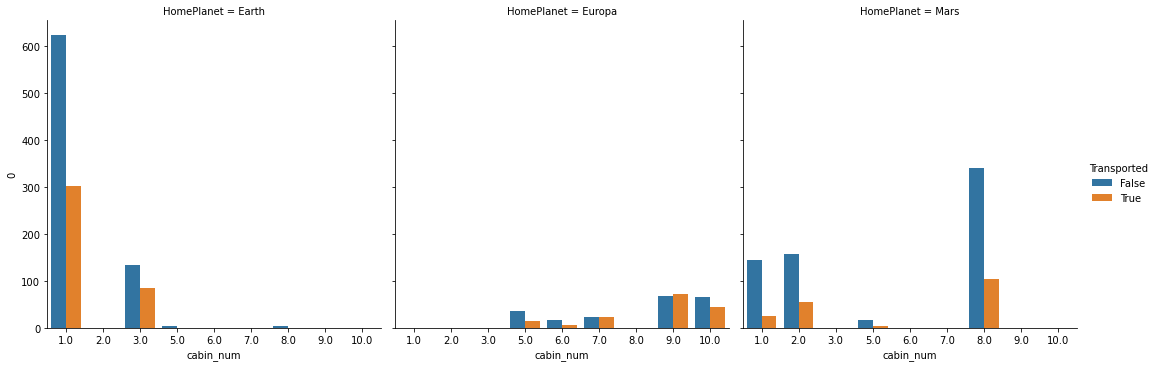

In [120]:
shop_grp = shop_df.groupby(["Transported", "HomePlanet","cabin_num"]).size().reset_index()
sns.catplot(data=shop_grp, x = "cabin_num" , y=0, hue="Transported", col="HomePlanet", kind="bar")

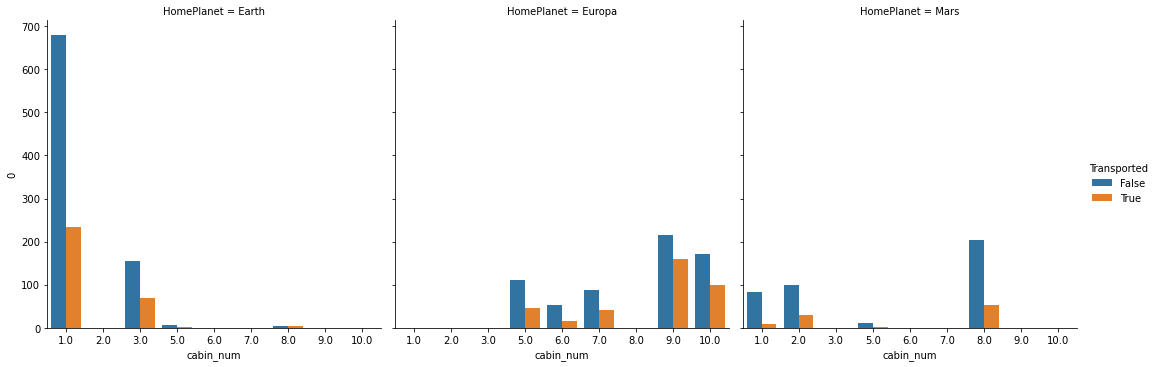

In [121]:
spa_grp = spa_df.groupby(["Transported", "HomePlanet","cabin_num"]).size().reset_index()
sns.catplot(data=spa_grp, x = "cabin_num" , y=0, hue="Transported", col="HomePlanet", kind="bar")

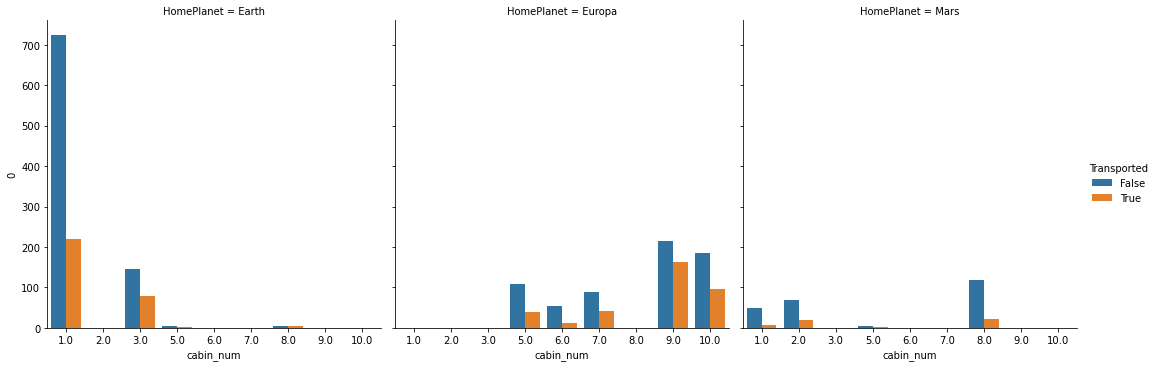

In [122]:
vr_grp = vr_df.groupby(["Transported", "HomePlanet","cabin_num"]).size().reset_index()
sns.catplot(data=vr_grp, x = "cabin_num" , y=0, hue="Transported", col="HomePlanet", kind="bar")

* Europa + shop + cabin7 and 9 had a good chance to survive
* earth + vr cabin 1 = dead
# work on that

In [123]:
#service_grp = service_df.groupby(["Transported", "HomePlanet"]).size().reset_index()
room_grp = room_df.groupby(["Transported", "HomePlanet"]).size().reset_index()
food_grp = food_df.groupby(["Transported", "HomePlanet"]).size().reset_index()
shop_grp = shop_df.groupby(["Transported", "HomePlanet"]).size().reset_index()
spa_grp = spa_df.groupby(["Transported", "HomePlanet"]).size().reset_index()
vr_grp = vr_df.groupby(["Transported", "HomePlanet"]).size().reset_index()

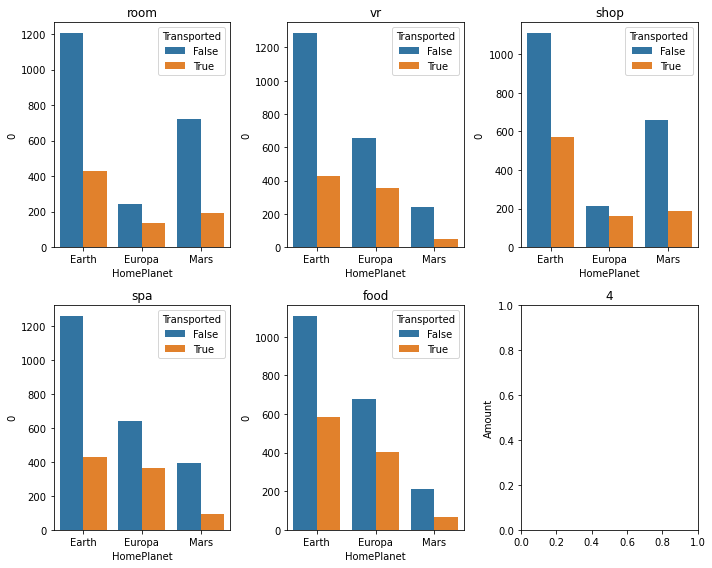

In [124]:
#help by Lars
courts = ["room", "food", "shop", "spa", "vr"]
zipped = zip([room_grp, food_grp, shop_grp,spa_grp, vr_grp], ["room", "food", "shop", "spa", "vr"])

fig, ax = plt.subplots(2,3, figsize=(10,8))

# enumerate zipped returns (i, (frame, name))
for i, (k,v) in enumerate(list(zipped)):
    sns.barplot(data = k, x="HomePlanet", y=0, hue="Transported" ,ax=ax[i%2,i%3])
    ax[i%2,i%3].set_title(v)
    plt.ylabel("Amount")
    plt.tight_layout()
    plt.title(i)
    
    
# we need to split that thing into the cabins as well <3

In [125]:
def planet_deck(df):
    df["planet_deck"] = df["cabin_deck"]+"_"+df["HomePlanet"]
    return df
train = planet_deck(train)
test = planet_deck(test)

In [126]:
# distribution of money spent on each court/service
transported_spent = pd.melt(train, id_vars="Transported", value_vars=["RoomService", "FoodCourt", "ShoppingMall"
                                               , "Spa", "VRDeck"])

In [127]:
transported_spent

,Transported,variable,value
0,False,RoomService,0.0
1,True,RoomService,109.0
2,False,RoomService,43.0
3,False,RoomService,0.0
4,True,RoomService,303.0
...,...,...,...
43460,False,VRDeck,74.0
43461,False,VRDeck,0.0
43462,True,VRDeck,0.0
43463,False,VRDeck,3235.0


<Figure size 720x1080 with 0 Axes>

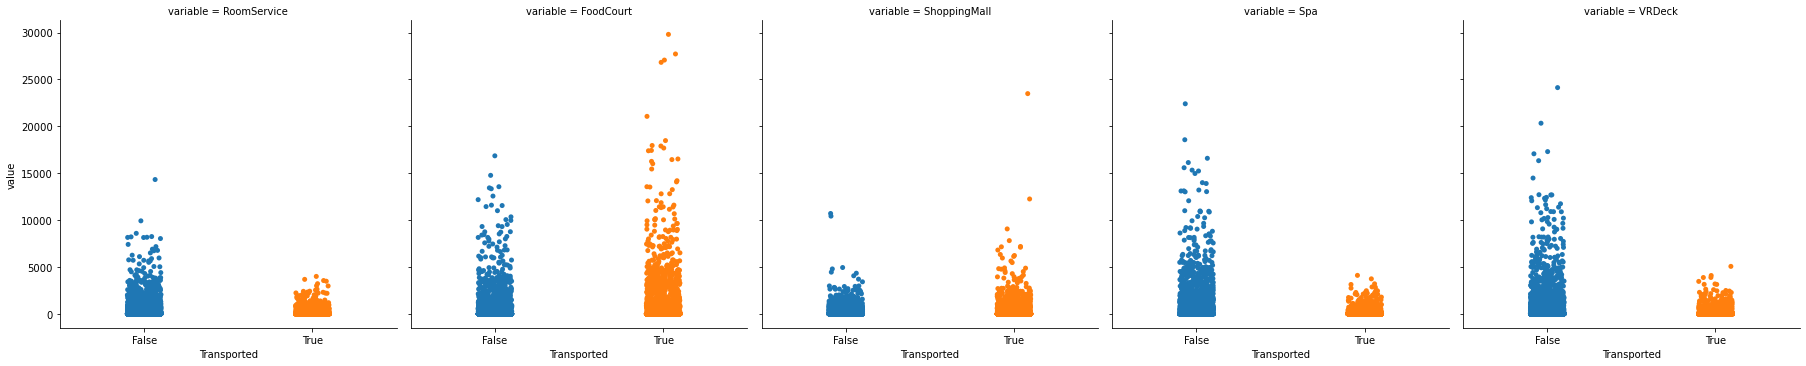

In [128]:
# distribution of money spent on each court/service
plt.figure(figsize=(10,15))
sns.catplot(data = transported_spent, y = "value"  , x="Transported", col="variable")


* im Spa und im VRDeck sind die leute eher gestorben wenn sie im durchschnitt mehr Geld ausgegeben haben
    * if spa_money > 3k, dann 1 für tod
    * if vrdeck_money > 3k, dann 1 für tod

In [129]:

train["service_kill"] = train.Spa.apply(lambda x: 1 if x>3000 else 0)
train["service_kill"] |= train.VRDeck.apply(lambda x: 1 if x>3000 else 0)
test["service_kill"] = test.Spa.apply(lambda x: 1 if x>3000 else 0)
test["service_kill"] |= test.VRDeck.apply(lambda x: 1 if x>3000 else 0)

# is it the best way to track if only spa und vrdeck greater then 3k that a person has died?

### How many ppl died/survived on each Service/Court 

In [130]:
# How many ppl died/survived on each Service/Court
transported_real_spent = transported_spent[transported_spent["value"]>0]
transported_real_spent

,Transported,variable,value
1,True,RoomService,109.0
2,False,RoomService,43.0
4,True,RoomService,303.0
6,True,RoomService,42.0
11,True,RoomService,39.0
...,...,...,...
43458,False,VRDeck,34.0
43459,True,VRDeck,330.0
43460,False,VRDeck,74.0
43463,False,VRDeck,3235.0


In [131]:
# How many ppl died/survived on each Service/Court
money_service_count = transported_real_spent.groupby(["Transported", "variable"]).size().reset_index()
money_service_count


,Transported,variable,0
0,False,FoodCourt,1999
1,False,RoomService,2172
2,False,ShoppingMall,1979
3,False,Spa,2302
4,False,VRDeck,2181
5,True,FoodCourt,1055
6,True,RoomService,763
7,True,ShoppingMall,919
8,True,Spa,884
9,True,VRDeck,829


<AxesSubplot:xlabel='variable', ylabel='0'>

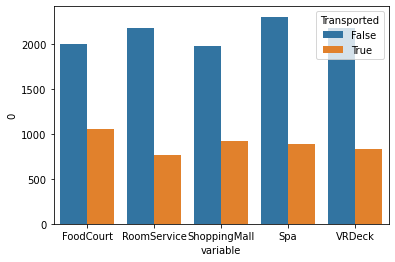

In [132]:

sns.barplot(data=money_service_count, x="variable", y = 0, hue="Transported" )

* wirkt sehr ausgeglichen, demnach nichts aussagend
* wie können wir das besser differenzieren, evtl homeplanet + deck + money_spent_service
* vllt klasse einführen: klasse 1, 2 und 3 für Erde, Europa und Mars

In [133]:
train.groupby(["Transported", "cabin_side"]).size()

Transported  cabin_side
False        P             2308
             S             2007
True         P             1898
             S             2480
dtype: int64

* Cabin side rate ausrechnen: 
    * P = 2308+1898 / all * (1898/2308)
    * S = 2007+2480 / all * (2480/2007

In [134]:
def cabin_converter(row):
    if row == "P":
        rate =   1898/(2308+1898)
        return rate

    elif row=="S":
        rate=2480/ (2480+2007 )
        return rate

In [135]:
train["deck_rate"] = train.cabin_side.apply(cabin_converter)
test["deck_rate"] = test.cabin_side.apply(cabin_converter)

In [322]:
train["cabin_side_deck"] = train["cabin_side"] + "_" + train['cabin_deck']
test["cabin_side_deck"] = test["cabin_side"] + "_" + test['cabin_deck']
train["cabin_side_rate"] = train["cabin_num"] * train['deck_rate']
test["cabin_side_rate"] = test["cabin_num"] * test['deck_rate']

In [323]:
train_1 = train.copy()
test_1 = test.copy()

In [324]:
train_1["train_test"] = 1
test_1["train_test"] = 0
data = train_1.append(test_1)

<ipython-input-324-3e84b41f2b49>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train_1.append(test_1)


In [325]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'spent_total', 'cabin_side', 'cabin_deck',
       'ticket_grp', 'surname', 'travel_grp', 'family', 'RoomService_rate',
       'FoodCourt_rate', 'ShoppingMall_rate', 'Spa_rate', 'VRDeck_rate',
       'age_to_money', 'age_bin', 'cabin_num', 'home_num', 'home_cabin_rate',
       'planet_deck', 'service_kill', 'deck_rate', 'cabin_side_deck',
       'cabin_side_rate'],
      dtype='object')

In [404]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# we can add gridsearch for Standardscaler, MinMaxScaler or Log on numerical features

scale = MinMaxScaler()
data[["spent_total" ,"ShoppingMall",'RoomService_rate', 'FoodCourt_rate', 'ShoppingMall_rate',
    'Spa_rate', 'VRDeck_rate',"age_to_money", "service_kill",'cabin_num',"cabin_side_rate" ,
      'home_num', "home_cabin_rate", 'deck_rate']] = scale.fit_transform(data[[
    "spent_total" ,"ShoppingMall",'RoomService_rate',
    'FoodCourt_rate', 'ShoppingMall_rate', 'Spa_rate', 'VRDeck_rate',
    "age_to_money", "service_kill",'cabin_num', 'home_num', "home_cabin_rate", 'deck_rate', "cabin_side_rate" ]])



In [405]:
cat_columns = ['CryoSleep',  "cabin_side_deck", "planet_deck",'cabin_side', 
               "Destination", "travel_grp"]

# , "planet_deck" , "VIP", , "age_bin", 'cabin_side', "cabin_deck","cabin_side_deck", "planet_deck",

feature_columns = [ 'spent_total','CryoSleep', 'Transported',"ShoppingMall",
                   'RoomService_rate', 'FoodCourt_rate', "travel_grp", "age_to_money",
                 'ShoppingMall_rate', 'Spa_rate', 'VRDeck_rate', "Destination", "planet_deck","cabin_side_deck",
                  "train_test",  "service_kill", 'cabin_num', 'home_num', "home_cabin_rate",
                   'deck_rate', 'cabin_side', "cabin_side_rate" ] 
# "VIP", "HomePlanet", "planet_deck","age_bin",

data_df = data[feature_columns]

In [406]:
train_df = data_df[data_df["train_test"]==1]

#train_df.drop(["train_test", "Transported"], axis=1, inplace=True)

In [407]:
train_ohe = pd.get_dummies(data=train_df, columns=cat_columns, drop_first=True)


In [408]:
test_df = data_df[data_df["train_test"]==0].copy()
test_df.drop(["train_test", "Transported"], axis=1, inplace=True)

In [409]:
test_ohe = pd.get_dummies(data=test_df, columns=cat_columns, drop_first=True)


In [410]:
X = train_ohe.drop(['Transported', "train_test"], axis=1)
y = train_ohe.Transported.values

In [411]:
y = y.astype("int")

In [412]:
for i in X.columns:
    if i not in test_ohe.columns:
        X.drop(i, axis=1, inplace=True)

Sei $g$ die Größe aller Reisenden. Sei $el$ die absolute Häufigkeit überlebter Personen der Erde. Sei $l$ die absolute Häufigkeit an überlebten Personen insgesamt. Sei $a$ der Anteil an Personen, die von der Erde aus geflogen sind. Dann gilt:
$p(l)=\frac{l}{g}\\ p(e)=\frac{a}{g}\\ p(l\mid e)=\frac{p(e\cap l)}{p(e)}=\frac{p(e\mid l) p(l)}{p(e)}=\frac{\frac{el}{g}\frac{l}{g}}{\frac{a}{g}}$

# Prediction

In [413]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import xgboost as xgb

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

trials = Trials()

best_hyperparams = fmin(fn = "binary:hinge",
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
                       

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

In [430]:
X.drop(drop_list, axis=1, inplace=True)
test_ohe.drop(drop_list, axis=1, inplace=True)

In [431]:
# Param grid for random search
params = {
        #"booster" : ["booster", "dart"],
        'n_estimators' : [  100,200,300,500,800],
        'min_child_weight': [0, 0.1, 1, 2, 5,],
        'gamma': [ 0.1,  1, 2, 5, 10],
        'subsample': [0.5,0.6, 0.8, 1.0],
        'learning_rate': [0.01, 0.05,0.1],
        'max_depth': [2,3,4,5,6,7,8,9,10],
        "max_delta_step" : [0,1,5,10],
        "objective": ["binary:hinge"]
        }
    
# Instantiate and test the model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False ,gamma=6, learning_rate=0.05, objective="binary:hinge",
                            max_delta_step=10,
                            max_depth=6,min_child_weight=2, n_estimators=300, subsample=0.5)
#rs_model = RandomizedSearchCV(xgb_clf, param_distributions=params, 
 #                           n_iter=20, scoring='accuracy', cv=5, verbose=3, random_state=42)
#rs_model.fit(X, y)
xgb_clf.fit(X, y)
#y_pred = rs_model.predict(X_test)

/Users/benjamin.korke/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=6, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=10,
              max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, objective='binary:hinge', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=0.5, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [432]:
rs_model.best_params_

{'subsample': 0.5,
 'objective': 'binary:hinge',
 'n_estimators': 300,
 'min_child_weight': 2,
 'max_depth': 6,
 'max_delta_step': 10,
 'learning_rate': 0.05,
 'gamma': 1}

In [433]:
# XGB
# TRAIN-TEST_SPLIT
y_hat = xgb_clf.predict(X)
#y_hat = rs_model.predict(X)
print(accuracy_score(y, y_hat))


0.8321638099620384


In [434]:
# XGB real Test Data
kaggle_pred = xgb_clf.predict(test_ohe).astype(bool)
#kaggle_pred = xgb_clf.predict(test_ohe).astype(bool)
#kaggle_pred = le.inverse_transform(kaggle_pred_raw)

/Users/benjamin.korke/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [435]:
kaggle_pred

array([ True, False,  True, ...,  True,  True,  True])

In [436]:
len(kaggle_pred)

4277

In [437]:
di = {
    "PassengerId": test["PassengerId"],
    "Transported" : kaggle_pred
}

submission = pd.DataFrame(data=di)
submission["Transported"] = submission["Transported"]

submission.to_csv("submission.csv", index=False)
df_sub = pd.read_csv("submission.csv")

In [438]:
df_sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [439]:

importances = xgb_clf.feature_importances_

print(importances)

[0.05008766 0.01678466 0.01468871 0.04951906 0.07021039 0.05595144
 0.01450537 0.01571549 0.018351   0.05811108 0.02154911 0.04805727
 0.02575579 0.03018129 0.06677882 0.02829065 0.01777396 0.01210112
 0.02138353 0.01715411 0.02229997 0.0103972  0.02254061 0.01580113
 0.01932289 0.01329017 0.03670068 0.011472   0.01163546 0.01482028
 0.01466833 0.01170257 0.01898377 0.05778887 0.0229392  0.02257078
 0.02011559]


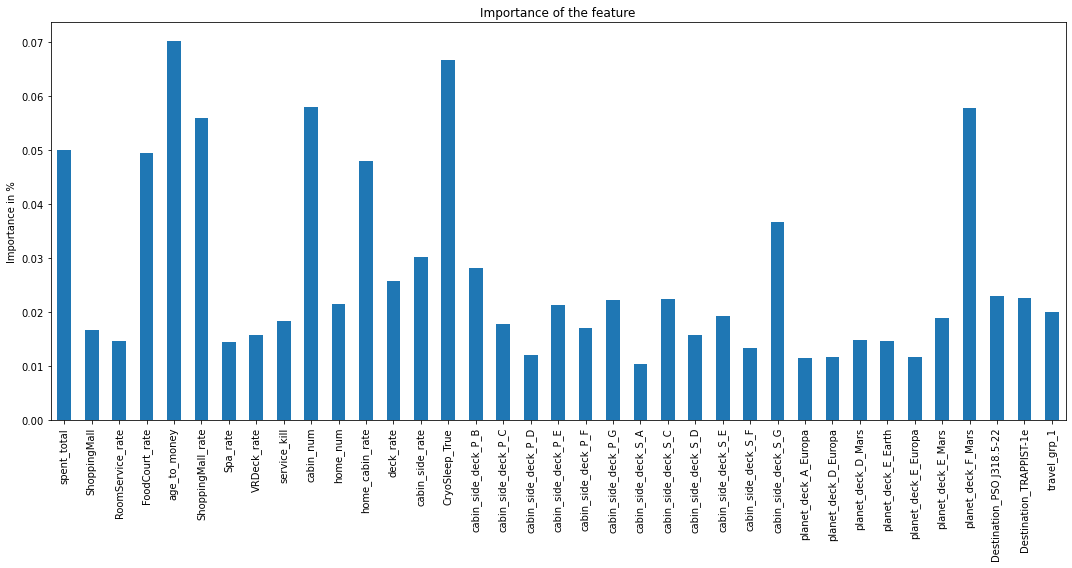

In [440]:
importances = xgb_clf.feature_importances_
feature_importances = pd.Series(importances, index=test_ohe.columns)

fig, ax = plt.subplots(figsize=(15, 8))
feature_importances.plot.bar()
ax.set_title("Importance of the feature")
ax.set_ylabel("Importance in %")
fig.tight_layout()
plt.show() 

In [428]:
test_ohe.columns

Index(['spent_total', 'ShoppingMall', 'RoomService_rate', 'FoodCourt_rate',
       'age_to_money', 'ShoppingMall_rate', 'Spa_rate', 'VRDeck_rate',
       'service_kill', 'cabin_num', 'home_num', 'home_cabin_rate', 'deck_rate',
       'cabin_side_rate', 'CryoSleep_True', 'cabin_side_deck_P_B',
       'cabin_side_deck_P_C', 'cabin_side_deck_P_D', 'cabin_side_deck_P_E',
       'cabin_side_deck_P_F', 'cabin_side_deck_P_G', 'cabin_side_deck_S_A',
       'cabin_side_deck_S_C', 'cabin_side_deck_S_D', 'cabin_side_deck_S_E',
       'cabin_side_deck_S_F', 'cabin_side_deck_S_G', 'planet_deck_A_Europa',
       'planet_deck_D_Europa', 'planet_deck_D_Mars', 'planet_deck_E_Earth',
       'planet_deck_E_Europa', 'planet_deck_E_Mars', 'planet_deck_F_Mars',
       'planet_deck_G_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'travel_grp_1'],
      dtype='object')

In [429]:
drop_list = ['planet_deck_G_Mars']

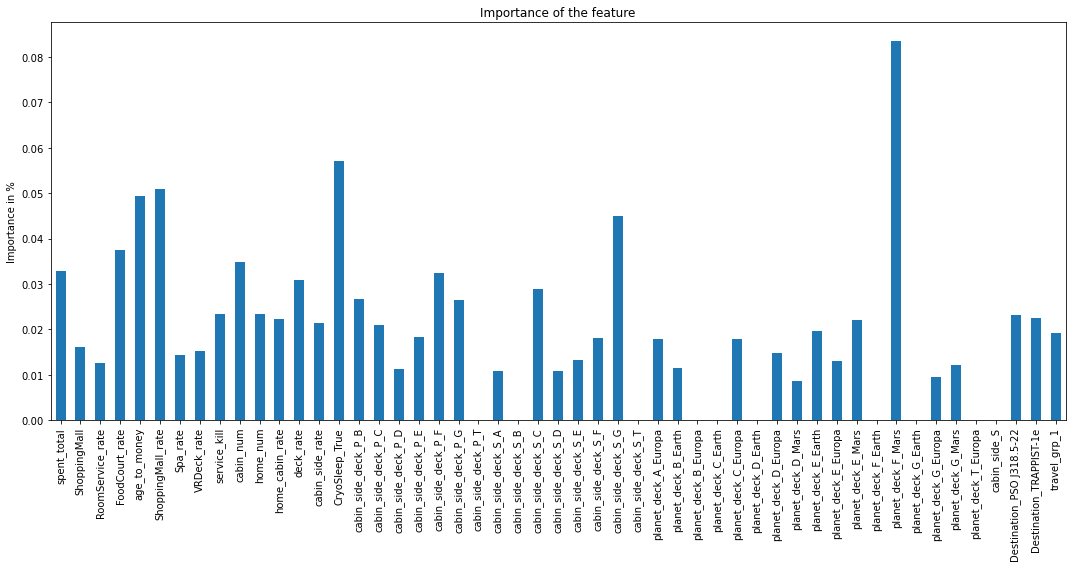

In [346]:
importances_rs = rs_model.best_estimator_.feature_importances_
feature_importances_rs = pd.Series(importances_rs, index=test_ohe.columns)

fig, ax = plt.subplots(figsize=(15, 8))
feature_importances_rs.plot.bar()
ax.set_title("Importance of the feature")
ax.set_ylabel("Importance in %")
fig.tight_layout()
plt.show() 

In [348]:
test_ohe.columns

Index(['spent_total', 'ShoppingMall', 'RoomService_rate', 'FoodCourt_rate',
       'age_to_money', 'ShoppingMall_rate', 'Spa_rate', 'VRDeck_rate',
       'service_kill', 'cabin_num', 'home_num', 'home_cabin_rate', 'deck_rate',
       'cabin_side_rate', 'CryoSleep_True', 'cabin_side_deck_P_B',
       'cabin_side_deck_P_C', 'cabin_side_deck_P_D', 'cabin_side_deck_P_E',
       'cabin_side_deck_P_F', 'cabin_side_deck_P_G', 'cabin_side_deck_P_T',
       'cabin_side_deck_S_A', 'cabin_side_deck_S_B', 'cabin_side_deck_S_C',
       'cabin_side_deck_S_D', 'cabin_side_deck_S_E', 'cabin_side_deck_S_F',
       'cabin_side_deck_S_G', 'cabin_side_deck_S_T', 'planet_deck_A_Europa',
       'planet_deck_B_Earth', 'planet_deck_B_Europa', 'planet_deck_C_Earth',
       'planet_deck_C_Europa', 'planet_deck_D_Earth', 'planet_deck_D_Europa',
       'planet_deck_D_Mars', 'planet_deck_E_Earth', 'planet_deck_E_Europa',
       'planet_deck_E_Mars', 'planet_deck_F_Earth', 'planet_deck_F_Mars',
       'planet_deck_

In [349]:
drop_list = ['cabin_side_deck_P_T','cabin_side_deck_S_B', 'cabin_side_deck_S_T','planet_deck_B_Europa',
             'planet_deck_C_Earth','planet_deck_D_Earth','planet_deck_F_Earth','planet_deck_G_Earth',
            'planet_deck_T_Europa','cabin_side_S']





# Best Placement

Score 80,640%

FEatures:


scale = StandardScaler()
data[["spent_total" ,"shopping_rate",'RoomService_rate', 'FoodCourt_rate', 'ShoppingMall_rate',
    'Spa_rate', 'VRDeck_rate',"age_to_money", "service_kill_vrdeck",
      "service_kill_spa",'cabin_num', 'home_num']] = scale.fit_transform(data[[
    "spent_total" ,"shopping_rate",'RoomService_rate', 'FoodCourt_rate', 'ShoppingMall_rate',
    'Spa_rate', 'VRDeck_rate',"age_to_money", "service_kill_vrdeck", "service_kill_spa",'cabin_num', 'home_num']])

___

cat_columns = ['CryoSleep',  "cabin_side_deck", "planet_deck",
               "Destination", "travel_grp"]

* "planet_deck" , "VIP", , "age_bin", 'cabin_side', "cabin_deck",

feature_columns = [ 'spent_total','CryoSleep', 'Transported',"shopping_rate",
                   'RoomService_rate', 'FoodCourt_rate', "travel_grp", "age_to_money",
                 'ShoppingMall_rate', 'Spa_rate', 'VRDeck_rate', "Destination", "planet_deck","cabin_side_deck",
                  "train_test",  "service_kill_vrdeck", "service_kill_spa", 'cabin_num', 'home_num' ] 
* "VIP", "HomePlanet", "planet_deck","age_bin",

data_df = data[feature_columns]

___

xgb_clf = xgb.XGBClassifier(use_label_encoder=False ,gamma=2, learning_rate=0.08, objective="binary:hinge",
                            max_delta_step=1,
                            max_depth=6,min_child_weight=0, n_estimators=150, subsample=0.8)

___

drop_list = ["ShoppingMall_rate", "cabin_side_deck_P_T", "cabin_side_deck_S_T",
            "planet_deck_B_Earth", "planet_deck_C_Earth", "planet_deck_D_Earth",
            'planet_deck_G_Mars','planet_deck_D_Europa','planet_deck_E_Europa',
            'planet_deck_G_Mars', 'planet_deck_T_Europa', 'cabin_side_deck_S_A','Destination_PSO J318.5-22',
            'cabin_side_deck_P_C', 'cabin_side_deck_P_E', 'cabin_side_deck_S_F', 'planet_deck_B_Europa',
            'planet_deck_D_Mars', 'planet_deck_G_Europa']

# Score 80,967

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# we can add gridsearch for Standardscaler, MinMaxScaler or Log on numerical features

scale = StandardScaler()
data[["spent_total" ,"ShoppingMall",'RoomService_rate', 'FoodCourt_rate', 'ShoppingMall_rate',
    'Spa_rate', 'VRDeck_rate',"age_to_money", "service_kill",'cabin_num', 'home_num', "home_cabin_rate"]] = scale.fit_transform(data[[
    "spent_total" ,"ShoppingMall",'RoomService_rate', 'FoodCourt_rate', 'ShoppingMall_rate',
    'Spa_rate', 'VRDeck_rate',"age_to_money", "service_kill",'cabin_num', 'home_num', "home_cabin_rate"]])


cat_columns = ['CryoSleep',  "cabin_side_deck", "planet_deck",
               "Destination", "travel_grp"]

# , "planet_deck" , "VIP", , "age_bin", 'cabin_side', "cabin_deck",

feature_columns = [ 'spent_total','CryoSleep', 'Transported',"ShoppingMall",
                   'RoomService_rate', 'FoodCourt_rate', "travel_grp", "age_to_money",
                 'ShoppingMall_rate', 'Spa_rate', 'VRDeck_rate', "Destination", "planet_deck","cabin_side_deck",
                  "train_test",  "service_kill", 'cabin_num', 'home_num', "home_cabin_rate" ] 
# "VIP", "HomePlanet", "planet_deck","age_bin",

data_df = data[feature_columns]


# Instantiate and test the model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False ,gamma=10, learning_rate=0.07, objective="binary:hinge",
                            max_delta_step=1,
                            max_depth=12,min_child_weight=5, n_estimators=300, subsample=0.8)
                            
drop_list = ['cabin_side_deck_P_T','cabin_side_deck_S_T','planet_deck_B_Earth', 'planet_deck_B_Europa',
       'planet_deck_C_Earth','planet_deck_D_Earth','planet_deck_T_Europa']